In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot

from pyswi import SwiModel

In [15]:
# space discretization
nlay = 1
ncol = 21
delx = 50
# time discretization
delt = 2000
nstep = 40
hfini = np.zeros(ncol)
hsini = np.zeros(ncol)
# boundary conditions
hleft = 0
hright = 0
# aquifer
k = 10 # horizontal hydraulic conductivity, m/d
S = 0.2 # storage coefficient, -
Se = 1e-4 # specific storage coef, m^(-1)
zt = 0 # aquifer top, m
zb = -40 # aquifer bottom, m
rhof = 1000 # freshwater density, kg/m3
rhos = 1025 # saltwater density, kg/m3
# source
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
# fixed
fixed = [[0, 0, hleft], [0, ncol - 1, hright]]

In [16]:
ml = SwiModel(nlay, ncol, delx, xleftc=-1000)
ml.tdis(nstep=1, delt=1, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=0, Se=0, zb=zb, zt=zt, rhof=rhof, rhos=rhos) # zero storage means instantaneous steady state
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hsol, zetasol = ml.simulate_freshonly()

iterations: 6


In [17]:
ml.k

array([[10.]])

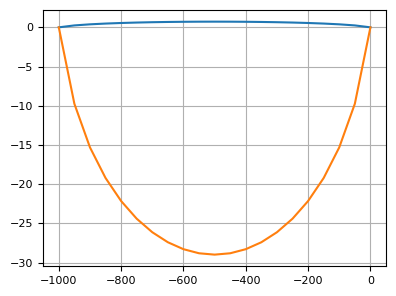

In [18]:
plt.subplot(111)
plt.plot(ml.xc, hsol[1, 0])
plt.plot(ml.xc, zetasol[1, 0])
plt.grid()

In [10]:
zetasol[1, 0]

array([  0.        , -13.96424004, -22.27100487, -28.42710197,
       -33.37144836, -37.50430702, -41.03764792, -44.0989456 ,
       -46.77151258, -49.11304914, -51.16522425, -52.95906265,
       -54.51817571, -55.86079883, -57.00112716, -57.95021764,
       -58.71661065, -59.30676258, -59.72534534, -59.97544768,
       -60.05869957, -59.97544768, -59.72534534, -59.30676258,
       -58.71661065, -57.95021764, -57.00112716, -55.86079883,
       -54.51817571, -52.95906265, -51.16522425, -49.11304914,
       -46.77151258, -44.0989456 , -41.03764792, -37.50430702,
       -33.37144836, -28.42710197, -22.27100487, -13.96424004,
         0.        ])

In [27]:
# space discretization
nlay = 5
ncol = 41
delx = 50
# time discretization
delt = 2000
nstep = 40
hfini = np.zeros((nlay, ncol))
hsini = np.zeros((nlay, ncol))
# boundary conditions
hleft = 0
hright = 0
# aquifer
k = 10 # horizontal hydraulic conductivity, m/d
S = 0.2 # storage coefficient, -
Se = 1e-4 # specific storage coef, m^(-1)
H = 100
z = np.linspace(0, -H, nlay + 1)
zt = z[:-1] # aquifer top, m
zb = z[1:] # aquifer bottom, m
rhof = 1000 # freshwater density, kg/m3
rhos = 1025 # saltwater density, kg/m3
# source
N = 0.001
Qf = [[0, icol, N * delx] for icol in np.arange(ncol)]
# fixed
fixed = [[0, 0, hleft], [0, ncol - 1, hright]]

In [28]:
ml = SwiModel(nlay, ncol, delx, xleftc=-1000)
ml.tdis(nstep=1, delt=1, hfini=hfini, hsini=hsini)
ml.aquifer(k, S=0, Se=0, zb=zb, zt=zt, rhof=rhof, rhos=rhos) # zero storage means instantaneous steady state
ml.set_source(Qf)
ml.set_fixed(fixed, fixed)
hsol2, zetasol2 = ml.simulate_freshonly()

iterations: 7


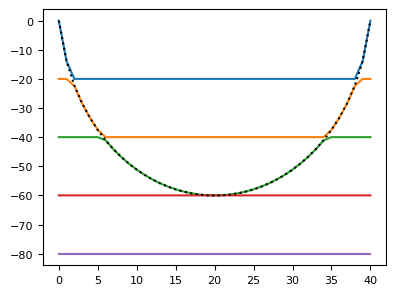

In [29]:
for ilay in range(nlay):
    plt.plot(zetasol2[1, ilay])
plt.plot(zetasol[1, 0], 'k:')

### Start pumping

In [38]:
Qfnew = [[0, icol, N * delx] for icol in np.arange(ncol)]
Qfnew[20] = [0, 20, -12 * 0.05]

In [39]:
ml = SwiModel(nlay, ncol, delx, xleftc=-1000)
ml.tdis(nstep=1, delt=1, hfini=hsol2[-1], hsini=hsini)
ml.aquifer(k, S=0, Se=0, zb=zb, zt=zt, rhof=rhof, rhos=rhos) # zero storage means instantaneous steady state
ml.set_source(Qfnew)
ml.set_fixed(fixed, fixed)
hsol2, zetasol3 = ml.simulate_freshonly()

iterations: 4


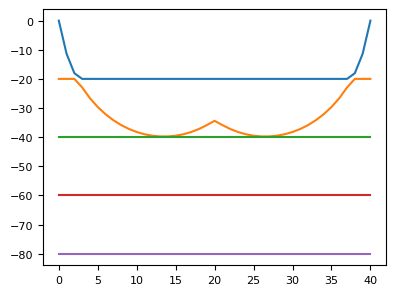

In [40]:
for ilay in range(nlay):
    plt.plot(zetasol3[1, ilay])

In [31]:
zt.T

array([  0., -20., -40., -60., -80.])

In [33]:
zt.ndim

1